# 오차 행렬
---

**오차행렬(confusion matrix, 혼동행렬)**은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지를 함께 보여주며 이진 분류에서의 성능 지표로 자주 사용됩니다.

분류 모델이 예측을 수행하면서 헷갈린다는 말의 의미는 어떠한 유형의 예측 오류가 발생하는지를 뜻합니다.

오차 행렬은 위와 같이 4분면 행렬로 구분되며 **실제 레이블** 클래스 값과 **예측 레이블**클래스 값이 어떻게 매핑되는지를 표현합니다.


예측된 클래스 값과 실제 클래스 값을 기준으로 TRUE, FALSE로 분류하며 **TN, FP, FN, TP** 의 행태로 값을 다양하게 분류해 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지를 알 수 있습니다.

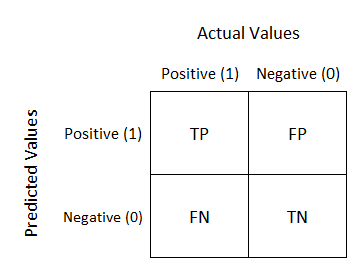

- **TN는 예측값을 Negative로 예측, 실제 값 역시 Negative**



- **FP는 예측값을 Positive로 예측, 실제 값은 Negative**



- **FN은 예측값을 Negative로 예측, 실제 값은 Positive**



- **TP는 예측값을 Positive로 예측, 실제 값 역시 Positive**

TN, FP, FN, TP 구분을 이해하기 어렵다면 아래의 그림을 참고합시다.

# confusion matrix example
---

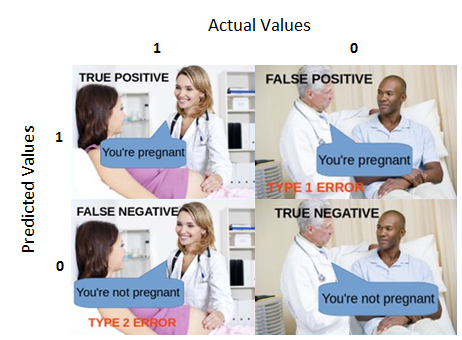

# confustion_matrix()
---

In [1]:
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
titanic.shape

(891, 15)

타이타닉 데이터의 남녀 생존율은 아래와 같습니다.

In [5]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

따라서 단순히 성별이 남성이면 사망으로 예측하는 매우 간단한 알고리즘을 이용해 생존자를 예측하고 오차행렬을 구해보겠습니다.

In [6]:
from sklearn.base import BaseEstimator

class SimpleClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

In [7]:
# 간단한 계산을 위해 sex, survived 컬럼만 이용하고 sex 컬럼은 레이블 인코딩을 진행합니다.

titanic = titanic[['sex','survived']]
titanic['sex'] = titanic['sex'].astype('category').cat.codes

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic[['sex']], titanic[['survived']], test_size=0.2)

In [9]:
Classifier = SimpleClassifier()

Classifier.fit(X_train, y_train)
simple_pred = Classifier.predict(X_test)

In [10]:
(simple_pred == y_test).sum() / len(y_test)

survived    0.72067
dtype: float64

위의 결과를 확인하면 단순히 성별을 가지고 이진 분류된 결과가 무려 81%로 측정됩니다. 

이전에 포스팅에서도 언급했듯이 분류 문제에서 정확도 만을 가지고 모델 성능 평가 지표로 이용했을 때 발생하는 문제점입니다.

이번에는 위의 예측 결과를 토대로 오차행렬을 구해 어떤 유형의 예측 오류가 발생하는지 확인해봅시다.

In [11]:
# confusion_matrix 임포트

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, simple_pred)
conf_mat

array([[90, 21],
       [29, 39]], dtype=int64)

전체 Titanic 데이터 891건에서 클래스 값 분포는 TN 106건, FP 18건, FN 15건, TP 40건 입니다.

이 오차 행렬을 이용해 **정확도, 정밀도, 재현율** 값을 구할 수 있게 됩니다.

# 오차 행렬_Accuracy, Precision, Recall
---

위에서 단순하게 성별을 이용해 생존 여부를 분류하는 이진 분류 모델을 생성했습니다.

그리고 그 결과를 토대로 오차 행렬을 만들고 이것을 어떻게 성능 평가 지표로 사용할 수 있는지 알아보겠습니다.

**정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN + TP)/(TN + FP + FN + TP)**

In [12]:
# 오차 행렬을 이용한 정확도 계산

(conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0]+conf_mat[0,1]+conf_mat[1,0]+conf_mat[1,1])

0.7206703910614525

**정밀도 = TP / (FP + TP)**

In [13]:
# 오차 행렬을 이용한 정밀도 계산

conf_mat[0,0] / (conf_mat[0,1]+conf_mat[0,0])

0.8108108108108109

**재현율 = TP / (FN + TP)**

In [14]:
# 오차 행렬을 이용한 재현율 계산

conf_mat[0,0] / (conf_mat[1,1] + conf_mat[0,0])

0.6976744186046512

정밀도와 재현율은 다소 낯설게 느껴질 수 있습니다.

이 평가 지표들은 Positive 데이터 세트에 초점이 맞춰진 것입니다.


**정밀도**는 양성 예측도라고도 불리며 예측을 Positve로 한 데이터의 예측과 실제 값이 모두 Positive로 일치하는 비율을 의미합니다.

**재현율**은 민감도, TPR(True Positive Rate)라고도 불리며 실제 값이 Positve인 데이터 중 예측과 실제 값이 모두 Positive로 일치하는 비율을 의미합니다.

이진 분류 모델의 업무 특성에 따라 위의 평가 지표의 중요도가 달라질 수 있습니다.

**재현율이 상대적으로 중요한 경우는 Positve 데이터를 Negative로 판단하면 업무 상 큰 영향이 발생하는 경우입니다.**
(코로나 확진자를 양성이 아닌 음성으로 판단하는 경우)



**정밀도가 상대적으로 중요한 경우는 Negative 데이터를 Positive로 판단하면 업무 상 큰 영향이 발생하는 경우**
(금융 사기인 Positive를 Negative로 판단하여 금융 사기를 적발하지 못하는 경우)

위에선 오차 행렬을 구해 직접 수식을 작성해서 정확도, 정밀도, 재현율을 구했습니다.

하지만 이 계산은 sklearn에서 **precision_score(), recall_score()**를 제공해 간단하게 구할 수 있습니다.

또한 오차 행렬, 정확도, 정밀도, 재현율 등의 평가를 한번에 호출하는 **get_clf_eval()** 함수를 작성합니다.

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

이번엔 이진 분류를 위한 로지스틱 회귀를 이용해 타이타닉 데이터의 생존자를 예측해 위의 평가 지표들을 구해보겠습니다.

In [19]:
import pandas as pd
# 데이터 전처리

titanic = sns.load_dataset('titanic')
titanic = titanic.dropna()
titanic.drop(['class','who','deck','embark_town','alive'], axis=1, inplace=True)

titanic['pclass'] = pd.get_dummies(titanic['pclass'])
titanic['sex'] = titanic['sex'].astype('category').cat.codes
titanic['embarked'] = titanic['embarked'].astype('category').cat.codes
titanic['alone'] = titanic['alone'].astype('category').cat.codes

label = titanic.survived
titanic_df = titanic.drop('survived',axis=1)

X_train, X_test, y_train, y_test = train_test_split(titanic_df, label, test_size=0.2)

In [20]:
# 로지스틱 회귀 알고리즘을 이용한 생존자 이진 분류 모델

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

Confusion Matrix
[[11  3]
 [ 6 17]]
정확도:0.7567567567567568, 정밀도:0.85, 재현율:0.7391304347826086


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


이번엔 좀 더 다양한 feature들을 입력하고 모델을 생성했습니다.

이전 모델에 비해 정밀도는 상승했지만 정확도와 재현율이 낮아진 것을 확인할 수 있습니다.

정밀도가 상대적으로 중요한 경우는 Negative 데이터를 Positive로 판단하면 업무 상 큰 영향이 발생하는 경우라고 앞서 설명했습니다.

이 경우에 Negative는 사망으로 분류되며 사망자를 생존자로 분류하는 경우 더 큰 문제가 발생할 수 있습니다.

따라서 위의 단순 이진 분류 모델보다 더 성능이 좋다고 할 수 있습니다.

# 정밀도 재현율 Trade Off
---

로지스틱 회귀를 이용한 이진 분류에서의 정밀도는 높게 측정 되었지만 오히려 단순 이진 분류 모델보다 정확도나 재현율이 낮아진 것을 확인할 수 있습니다.

이처럼 **정밀도와 재현율은 상호 보와적 평가 지표로 트레이드 오프** 관계에 있습니다.



sklearn 에서 제공하는 predict_proba()를 이용해 이진 분류 모델이 분류 값을 결정하는데 이용하는 개별 데이터별 예측 확률을 얻을 수 있습니다.

In [21]:
# 학습이 완료된 분류 객체에서 호출

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('--------pred_proba-----\n', pred_proba[:5])
print('\n--------pred_result-----\n', "     ",pred[:5])

--------pred_proba-----
 [[0.70201069 0.29798931]
 [0.10490155 0.89509845]
 [0.12577489 0.87422511]
 [0.48010887 0.51989113]
 [0.03096083 0.96903917]]

--------pred_result-----
       [0 1 1 1 1]


보통의 이진 분류는 위의 결과처럼 임곗값(Threshold)을 50% : 50% 로 정하고 더 큰 값으로 분류를 결정하게 됩니다.

정밀도와 재현율의 트레이드 오프 관계를 이해하기 위해 이 로직을 직접 코드로 구현해보겠습니다.

In [22]:
from sklearn.preprocessing import Binarizer

X = [
    [1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]
]

# Binarizer의 threshold(임계값)을 1.1로 지정 1.1을 기준으로 0과 1로 분류
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


위에서 생성한 로지스틱 회귀 객체에서 얻은 개별 데이터 Positive 예측 확률을 이용해 임곗값을 임의로 지정하여 오차 행렬과 평가 지표들을 계산합니다.

In [23]:
from sklearn.preprocessing import Binarizer

# 임곗값 임의 지정
custom_threshold = 0.5

# Positive 클래스 컬럼 추출
pred_proba_1 = pred_proba[:,-1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_pred = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_pred)

Confusion Matrix
[[11  3]
 [ 6 17]]
정확도:0.7567567567567568, 정밀도:0.85, 재현율:0.7391304347826086


이번에는 임계값을 0.4로 지정하여 다시 계산해보겠습니다.

In [24]:
from sklearn.preprocessing import Binarizer

# 임곗값 임의 지정
custom_threshold = 0.4

# Positive 클래스 컬럼 추출
pred_proba_1 = pred_proba[:,-1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_pred = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_pred)

Confusion Matrix
[[ 9  5]
 [ 4 19]]
정확도:0.7567567567567568, 정밀도:0.7916666666666666, 재현율:0.8260869565217391


임곗값이란 Positive 예측값을 결정하는 척도입니다. 따라서 임곗값을 낮춘다는 것의 의미는 더 많은 데이터들을 Positive로 결정하겠다는 것입니다.

따라서 **Positive로 분류된 값이 많아지니 상대적으로 재현율 값이 상승합니다.**

재현율의 의미를 다시 확인하면 아래와 같습니다.

**재현율은 민감도, TPR(True Positive Rate)라고도 불리며 실제 값이 Positve인 데이터 중 예측과 실제 값이 모두 Positive로 일치하는 비율을 의미합니다.**

# precision_recall_curve()
---

임계값을 상승시키면서 정밀도와 재현율에 어떤 변화가 일어나는지 테스트해보겠습니다.

In [29]:
# 임계값을 0.4에서 0.6까지 0.5씩 증가
thresholds = list(np.arange(0.4, 0.6, 0.05))

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    for i in thresholds:
        binarizer = Binarizer(threshold = i).fit(pred_proba)
        pred = binarizer.transform(pred_proba)
        print('threshold : ',i)
        
        get_clf_eval(y_test, pred)

get_eval_by_threshold(y_test, pred_proba[:,-1].reshape(-1, 1), thresholds)

threshold :  0.4
Confusion Matrix
[[ 9  5]
 [ 4 19]]
정확도:0.7567567567567568, 정밀도:0.7916666666666666, 재현율:0.8260869565217391
threshold :  0.45
Confusion Matrix
[[10  4]
 [ 5 18]]
정확도:0.7567567567567568, 정밀도:0.8181818181818182, 재현율:0.782608695652174
threshold :  0.5
Confusion Matrix
[[11  3]
 [ 6 17]]
정확도:0.7567567567567568, 정밀도:0.85, 재현율:0.7391304347826086
threshold :  0.55
Confusion Matrix
[[12  2]
 [ 7 16]]
정확도:0.7567567567567568, 정밀도:0.8888888888888888, 재현율:0.6956521739130435


임계값이 상승에 따른 평가 지표를 확인하면 디폴트 임계값인 0.5의 정확도와 재현율이 높으면서 정밀도는 아주 약간 하락한 0.4 구간이 가장 이상적으로 확인됩니다.

이번에는 실제로 임계값 변화에 따른 정밀도와 재현율의 변화를 시각화 해보겠습니다.

**파란 점은 정밀도이고 빨간점은 재현율입니다.**

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


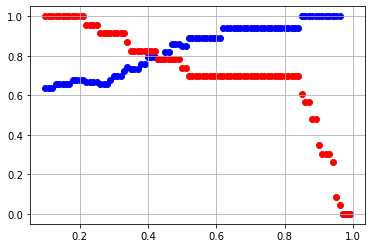

In [30]:
import matplotlib.pyplot as plt

thresholds = list(np.arange(0.1, 1, 0.01))

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    for i in thresholds:
        binarizer = Binarizer(threshold = i).fit(pred_proba)
        pred = binarizer.transform(pred_proba)
        
        plt.scatter(i, precision_score(y_test, pred), color='b')
        plt.scatter(i, recall_score(y_test, pred), color='r')

get_eval_by_threshold(y_test, pred_proba[:,-1].reshape(-1, 1), thresholds)

plt.grid()
plt.show()

sklearn에서는 임계값 조정을 위해 **Precision_recall_curve()** 를 제공합니다.

타이타닉 데이터의 경우 레이블 값이 1인 생존일 때의 예측 확률 값은 predict_proba() 함수에서 반환된 array의 두번째 컬럼입니다.

이 함수는 0.11 ~ 0.95의 임곗값을 가지고 있으며 해당 임곗값으로 반환되는 정밀도와 재현율을 반환합니다.

------------------------------precision---------------------------
 [0.67647059 0.66666667 0.65625    0.67741935 0.7        0.72413793
 0.75       0.74074074 0.73076923 0.76       0.79166667 0.7826087
 0.81818182 0.85714286 0.85       0.84210526 0.88888889 0.94117647
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]
------------------------------recalls---------------------------
 [1.         0.95652174 0.91304348 0.91304348 0.91304348 0.91304348
 0.91304348 0.86956522 0.82608696 0.82608696 0.82608696 0.7826087
 0.7826087  0.7826087  0.73913043 0.69565217 0.69565217 0.69565217
 0.69565217 0.65217391 0.60869565 0.56521739 0.52173913 0.47826087
 0.43478261 0.39130435 0.34782609 0.30434783 0.26086957 0.2173913
 0.17391304 0.13043478 0.08695652 0.04347826 0.        ]
------------------------------thresholds---------------------------
 [0.21360204 0.25354974 0.2874883

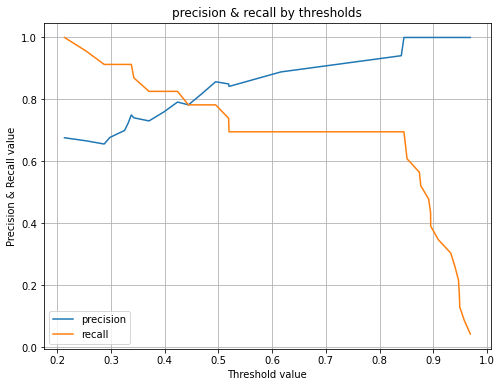

In [87]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 떄의 예측확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때 예측확률을 precision_recall_curve의 인자로 반환
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

print("------------------------------precision---------------------------\n",precisions)
print("------------------------------recalls---------------------------\n",recalls)
print("------------------------------thresholds---------------------------\n",thresholds)


thresholds_boundary = thresholds.shape[0]


plt.figure(figsize=(8, 6))
plt.title('precision & recall by thresholds')
plt.plot(thresholds, precisions[0:thresholds_boundary], label="precision")
plt.plot(thresholds, recalls[0:thresholds_boundary], label="recall")
plt.xlabel('Threshold value')
plt.ylabel('Precision & Recall value')
plt.grid()
plt.legend()

위 그래프를 통해 threshold(임계값)이 낮을 수록 True로 예측(survived=1) 하는 경우가 많아지기 때문에 재현율(recall)이 높아지고 정밀도는 낮아지는 모습을 보입니다.

또한 임계값이 약 4.5인 지점에서 recall과 precision이 비슷해지는 것을 확인할 수 있습니다.